### Importing Libraries

In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

### Load Audio File

In [2]:
audio_file = "./audio/test.wav"
claps, sr = librosa.load(audio_file)

print(f"Sample rate:                      {sr} samples per second")
print(f"Number of total samples of audio: {len(claps)} samples")
print(f"Duration of audio file:           {len(claps) / sr} seconds")
print(f"Duration of one sample:           {1 / sr:.6f} seconds")


Sample rate:                      22050 samples per second
Number of total samples of audio: 110250 samples
Duration of audio file:           5.0 seconds
Duration of one sample:           0.000045 seconds


### Showing the Time-Domain Graph

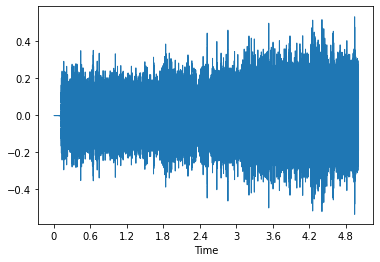

In [3]:
librosa.display.waveshow(claps)
plt.show()

### Creating our own RMS Energy Function

In [4]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

def rms_energy(signal: iter, frame_size: int, hop_length: int):
    
    # store the rms_energy in a list which will then be converted to an np array
    rms_energy = []

    # go through each frame
    for i in range(0, len(signal), hop_length):
        current_frame = signal[i:i + frame_size]
        rms_energy_of_current_frame = np.sqrt(sum(current_frame**2) / frame_size)
        rms_energy.append(rms_energy_of_current_frame)

    # return the result
    return np.array(rms_energy)

my_rms_energy = rms_energy(claps, frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH)


### Finding the RMS Energy

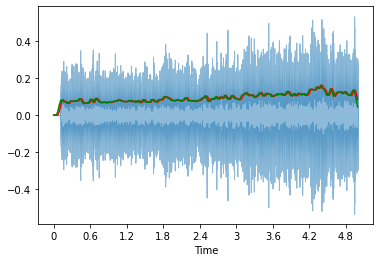

In [5]:
# get the first item (since the function returns an array of an array of items)
rms_energy = librosa.feature.rms(y=claps, frame_length=1024, hop_length=512)[0]

frames = range(0, rms_energy.size)
t = librosa.frames_to_time(frames, hop_length=512)

librosa.display.waveshow(claps, alpha=0.5)
plt.plot(t, rms_energy, color="r")
plt.plot(t, my_rms_energy, color="g")
plt.show()

### Creating our own Zero-Crossing Rate

In [9]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

def zcr(signal: iter, frame_size: int, hop_length: int, normalisation: str = "Minmax"):
    
    # create an array to store the zero-crossing rate
    zcr = []

    # loop through each frame
    for i in range(0, len(signal), hop_length):
        current_frame = signal[i:i+frame_size]
        
        # find the zero-crossing rate in the current frame
        current_zcr = 0
        for j in range(0, len(current_frame) - 1):
            current_signal = current_frame[j]
            next_signal = current_frame[j + 1]

            current_signal_value = 0
            if (current_signal > 0): current_signal_value = 1
            elif (current_signal < 0): current_signal_value = -1

            next_signal_value = 0
            if (next_signal > 0): next_signal_value = 1
            elif (next_signal < 0): next_signal_value = -1

            current_zcr += abs(current_signal_value - next_signal_value)
        
        zcr.append(current_zcr / 2)

    # transform to np array
    zcr = np.array(zcr)
    
    # normalisation using minimum and maximum
    if (normalisation == "Minmax"):
        min_zcr = np.min(zcr)
        max_zcr = np.max(zcr)

        for i in range(0, len(zcr)):
            zcr[i] = (zcr[i] - min_zcr) / (max_zcr - min_zcr)

    # normalisation using z-score
    if (normalisation == "z-score"):
        mean_zcr = np.mean(zcr)
        std_zcr = np.std(zcr)

        for i in range(0, len(zcr)):
            zcr[i] = (zcr[i] - mean_zcr) / std_zcr

    # return the result
    return zcr

my_zcr = zcr(claps, frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH, normalisation="Minmax")


### Finding the Zero-Crossing Rate (ZCR)

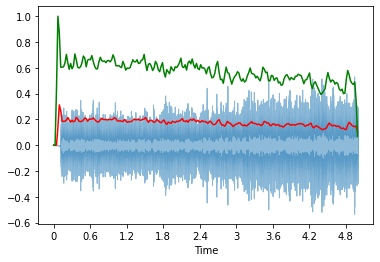

In [10]:
# similar to rms_energy
# we get the first item
zcr = librosa.feature.zero_crossing_rate(y=claps, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

frames = range(0, zcr.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

librosa.display.waveshow(claps, alpha=0.5)
plt.plot(t, zcr, color='r')
plt.plot(t, my_zcr, color='g')
plt.show()